# Problem Definition

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011). To predict the output power from the given variables like atmospheric pressure, atmospheric teperature, exhaust vacuum speed and relative humidity.

### Data Definition
The schema definition from UCI appears below:

    AT = Atmospheric Temperature in C
    V = Exhaust Vacuum Speed
    AP = Atmospheric Pressure
    RH = Relative Humidity
    PE = Power Output.
AT, V, AP, RH are independent variables and PE is dependent variable to predict.

### Data Prediction:

From the given information, we have to perform Exploratory Data Analysis to understand the data and perform modelling based on the requirement and target variable. In this scenario, the machine learning task is regression since the target we are trying to predict is numeric. Here, I performed different regression models with and without cross validation and compared their performance with accuracy and root mean square error. Different regression models include linear regression, decision tree regression, random forest regression and XGBoost regression

In [366]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [367]:
# Read input data
PowerPlant_Data = pd.read_excel("/Users/divyakonda/Downloads/ExplorationData/Data/PowerPlant/Data.xlsx")
print PowerPlant_Data.head()


      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [368]:
# Checking for NULL values
Data_Null_set = PowerPlant_Data.isnull()
print Data_Null_set.any()

AT    False
V     False
AP    False
RH    False
PE    False
dtype: bool


There are no NULL values in the data set

## Exploratory Data Analysis


In [369]:
# To decribe the variables
print PowerPlant_Data.describe()

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000



AT: 75% of temperature observations fall between 1.81 and 25.72. The values are concentrated around the mean. 

V: 75% of vacuum observations fall between 25.36 and 66.54. The values are more concentrated around the mean. 

AP: 75% of pressure observations fall between 992.89 and 1017.26. The values are more concentrated around the mean. 

RH: 75% of humidity observations fall between 25.56 and 84.83. The values are concentrated around the mean. 

PE: 75% of energy observations fall between 420.26 and 468.43. The values are more concentrated around the mean. 

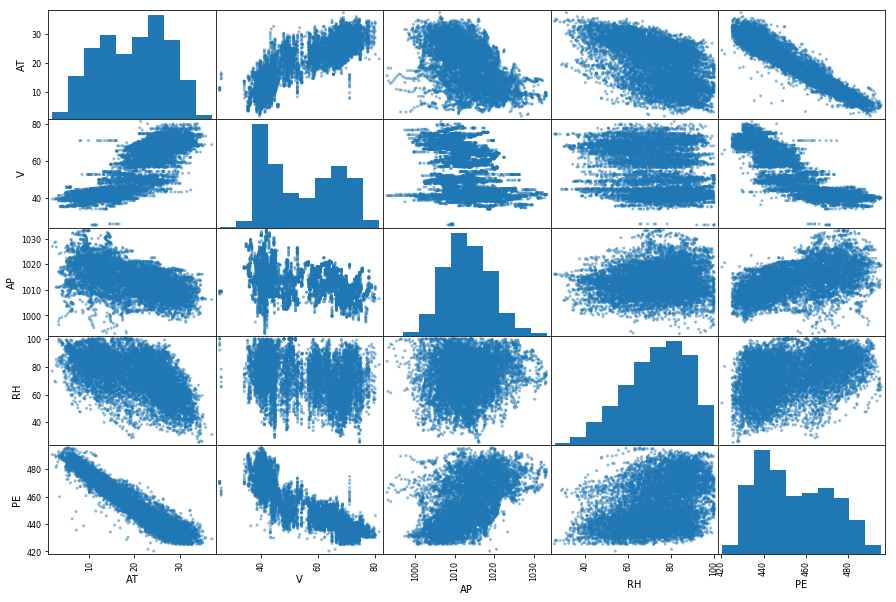

In [370]:
# Scatter matrix to know the relation between all available variables
from pandas.tools.plotting import scatter_matrix
plot = scatter_matrix(PowerPlant_Data, figsize=(15, 10))
plot[0,0].get_figure().show()

AT: Negative skew indicates that extreme values are towards the left and most of the values are concentrated to the right of mean

V: Positive skew indicates that extreme values are towards the right and most of the values are concentrated to the left of mean. Histogram shows a normal distribution

AP: Positive skew indicates that extreme values are towards the right and most of the values are concentrated to the left of mean. Histogram shows a normal distribution

RH: Negative skew indicates that extreme values are towards the left and most of the values are concentrated to the right of mean.

PE: Positive skew indicates that extreme values are towards the right and most of the values are concentrated to the left of mean. 

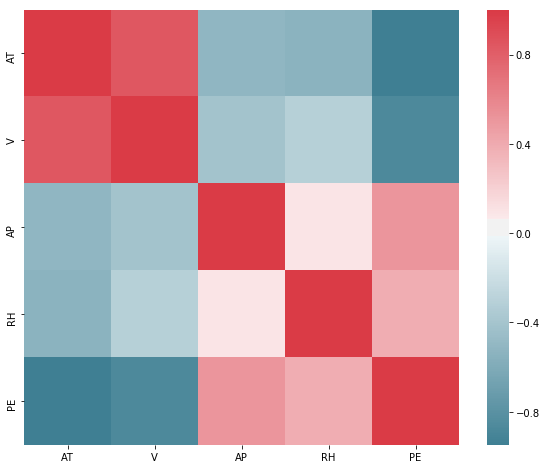

In [371]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = PowerPlant_Data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

From the above correlation map.

    Depedent variable PE is having strong positive correlation with AP and weak positive correlation with RH
    Depedent variable PE is having strong negative correlation with AT and weak negative correlation with V
    

## Data Preparation

In [372]:
# Feature set and Target label
Feature_set = PowerPlant_Data[['AT','V','AP','RH']]
Target_label = PowerPlant_Data[['PE']]

# Randomly split 80% for training data and 20% for test data
train_feature, test_feature, train_label, test_label = train_test_split(Feature_set, Target_label, test_size=0.2)

## Linear Regression Model

In [373]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(train_feature,train_label)

# Predicting the output power using test set 
label_pred_lr = linear_reg.predict(test_feature)

# Linear Regression Accuracy with test set
accuracy_lr = linear_reg.score(test_feature,test_label)
print('Linear Regression Accuracy: %.4f' % accuracy_lr)

# Root Mean Square Error of Linear Regression
lr_mse = mean_squared_error(test_label, label_pred_lr)
lr_rmse = np.sqrt(lr_mse)
print('Liner Regression RMSE: %.4f' % lr_rmse)

Linear Regression Accuracy: 0.9243
Liner Regression RMSE: 4.7352


In [374]:
# Predicting using cross validation (KFold method)
label_pred_lr_kf = cross_val_predict(linear_reg, Feature_set, Target_label, cv=10 )

# Linear Regression Accuracy with cross validation (KFold method)
accuracy_lr_kf = metrics.r2_score(Target_label, label_pred_lr_kf)
print('Cross-Predicted(KFold) Linear Regression Accuracy: %.4f' % accuracy_lr_kf)

# Root Mean Square Error of Cross-Predicted(KFold) Linear Regression
lr_kf_mse = mean_squared_error(Target_label, label_pred_kf_lr)
lr_kf_rmse = np.sqrt(lr_kf_mse)
print('Cross-Predicted(KFold) Linear Regression RMSE: %.4f' % lr_kf_rmse)

Cross-Predicted(KFold) Linear Regression Accuracy: 0.9286
Cross-Predicted(KFold) Linear Regression RMSE: 4.5600


## Decision Tree Regression

In [375]:
# Decision Tree Regression Model
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(train_feature,train_label)

#Predicting the ouput power using test set 
label_pred_dt = dt_reg.predict(test_feature)

#Decision Tree Regression Accuracy with test set
accuracy_dt = dt_reg.score(test_feature,test_label)
print('Decision Tree Regression Accuracy: %.4f' % accuracy_dt)

# Root Mean Square Error of Decision Tree regression
dt_mse = mean_squared_error(test_label, label_pred_dt)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree Regression RMSE: %.4f' % dt_rmse)

Decision Tree Regression Accuracy: 0.9322
Decision Tree Regression RMSE: 4.4805


In [376]:
#Predicting using cross validation (KFold method)
label_pred_dt_kf = cross_val_predict(dt_reg, Feature_set, Target_label, cv=10 )

#Decision Tree Regression Accuracy with cross validation
accuracy_dt_kf = metrics.r2_score(Target_label, label_pred_dt_kf)
print('Cross-Predicted(KFold) Decision Tree Regression Accuracy: %.4f' % accuracy_dt_kf)

# Root Mean Square Error of Cross-Predicted(KFold) Decision Tree regression
dt_kf_mse = mean_squared_error(Target_label, label_pred_dt_kf)
dt_kf_rmse = np.sqrt(dt_kf_mse)
print('Cross-Predicted(KFold) Decision Tree Regression RMSE: %.4f' % dt_kf_rmse)

Cross-Predicted(KFold) Decision Tree Regression Accuracy: 0.9292
Cross-Predicted(KFold) Decision Tree Regression RMSE: 4.5424


## Random Forest 

In [377]:
# Random Forest Regression Model
rf_reg = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_reg.fit(train_feature,train_label)

#Predicting the output power using test set 
label_pred_rf = rf_regressor.predict(test_feature)

#Random Forest Regression Accuracy with test set
accuracy_rf = rf_reg.score(test_feature,test_label)
print('Random Forest Regression Accuracy: %.4f' % accuracy_rf)

# Root Mean Square Error of Random Forest
rf_mse = mean_squared_error(test_label, label_pred_rf)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest Regression RMSE: %.4f' % rf_rmse)


Random Forest Regression Accuracy: 0.9625
Random Forest Regression RMSE: 1.7194


In [378]:
#Predicting using cross validation (KFold method)
label_pred_rf_kf = cross_val_predict(rf_reg, Feature_set, Target_label, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf_kf = metrics.r2_score(Target_label, label_pred_rf_kf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: %.4f' % accuracy_rf_kf)

# Root Mean Cross-Predicted(KFold) Square Error of Random Forest
rf_kf_mse = mean_squared_error(Target_label, label_pred_rf_kf)
rf_kf_rmse = np.sqrt(rf_kf_mse)
print('Cross-Predicted(KFold) Random Forest Regression RMSE: %.4f' % rf_kf_rmse)

Cross-Predicted(KFold) Random Forest Regression Accuracy: 0.9634
Cross-Predicted(KFold) Random Forest Regression RMSE: 3.2649


## XGBoost

In [379]:
# XGBoost Regression Model
xgb_reg = ensemble.GradientBoostingRegressor()
xgb_reg.fit(train_feature, train_label)

#Predicting the output power using test set 
label_pred_xgb = xgb_reg.predict(test_feature)

# XGBoost Regression Accuracy with test set
accuracy_xgb = xgb_reg.score(test_feature,test_label)
print('XGBoost Regression Accuracy: %.4f' % accuracy_xgb)

# Root Mean Square Error of XGBoost Regression model
xgb_mse = mean_squared_error(test_label, label_pred_rf)
xgb_rmse = np.sqrt(xgb_mse)
print('XGBoost Regression RMSE: %.4f' % xgb_rmse)

XGBoost Regression Accuracy: 0.9464
XGBoost Regression RMSE: 1.7194


In [380]:
#Predicting using cross validation (KFold method)
label_pred_xgb_kf = cross_val_predict(xgb_reg, Feature_set, Target_label, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_xgb_kf = metrics.r2_score(Target_label, label_pred_xgb_kf)
print('Cross-Predicted(KFold) XGBoost Regression Accuracy: %.4f' % accuracy_xgb_kf)

# Root Mean Cross-Predicted(KFold) Square Error of Random Forest
xgb_kf_mse = mean_squared_error(Target_label, label_pred_rf_kf)
xgb_kf_rmse = np.sqrt(xgb_kf_mse)
print('Cross-Predicted(KFold) XGBoost Regression RMSE: %.4f' % xgb_kf_rmse)

Cross-Predicted(KFold) XGBoost Regression Accuracy: 0.9481
Cross-Predicted(KFold) XGBoost Regression RMSE: 3.2649


## Model Selection

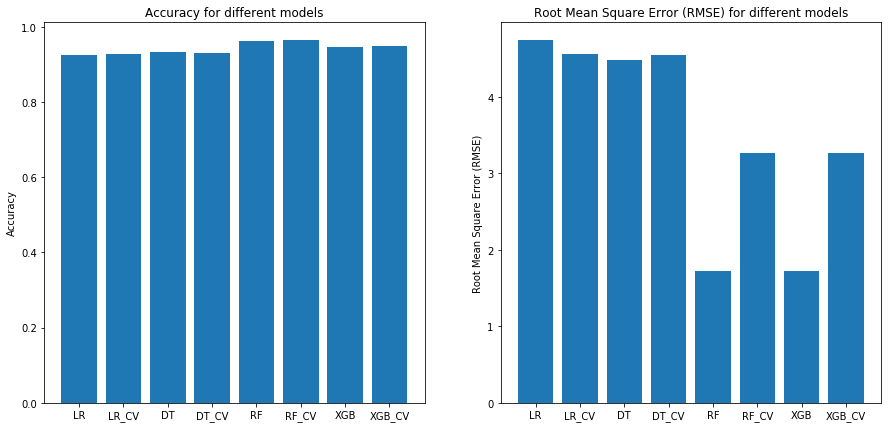

In [381]:

ind = np.arange(1, 9)
rmse = [lr_rmse,lr_kf_rmse,dt_rmse,dt_kf_rmse,rf_rmse,rf_kf_rmse,xgb_rmse,xgb_kf_rmse]
accuracy = [accuracy_lr,accuracy_lr_kf,accuracy_dt,accuracy_dt_kf,accuracy_rf,accuracy_rf_kf,accuracy_xgb,accuracy_xgb_kf]

fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(121)
plt.bar(ind, accuracy)
ax1.set_xticklabels(['LR','LR_CV','DT','DT_CV','RF','RF_CV','XGB','XGB_CV'])
ax1.set_xticks(ind)
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy for different models')

ax2 = fig.add_subplot(122)
plt.bar(ind, rmse)
ax2.set_xticklabels(['LR','LR_CV','DT','DT_CV','RF','RF_CV','XGB','XGB_CV'])
ax2.set_xticks(ind)
ax2.set_ylabel('Root Mean Square Error (RMSE)')
ax2.set_title('Root Mean Square Error (RMSE) for different models')

plt.show()

From the above observations,
    
    Random Forest with K-Fold cross validation is having more accuracy and low RMSE value compared to all other models. 

## Feature Relevance

RH-1.76%
AP-1.90%
V-6.03%
AT-90.31%


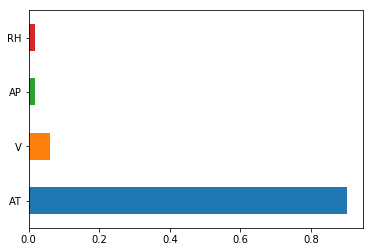

In [382]:
feature_labels = np.array(['AT','V','AP','RH'])
importance = rf_reg.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

(pd.Series(rf_reg.feature_importances_, index=feature_labels).nlargest(4).plot(kind='barh'))  

plt.show()


Feature relevance from Random Forest: 
  
    Most relevant feature is atmospheric temperature followed by vacuum, atmospheric pressure and relative humidity

## Conclusion
Out of three models linear regression, Random Forest and XBoost, Random Forest is having lowest root mean square error and hence, it is the best model that fits to the given data set.